In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import pylab as pl
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [2]:
#import dataset
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data', header = None,index_col=None,
                      names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA

In [4]:
# more about each class
iris_df["Class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

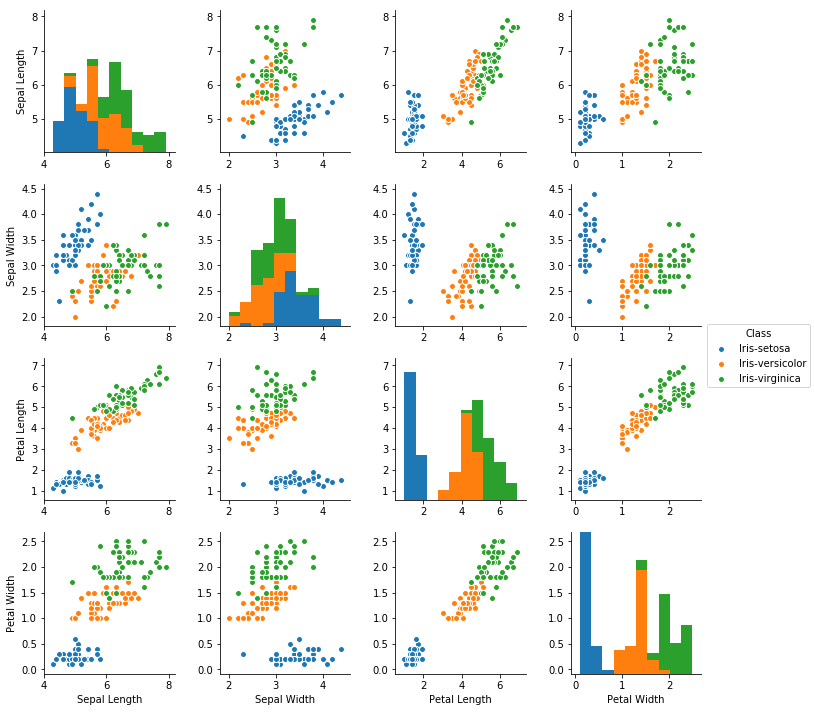

In [5]:
# pairplot with hue of each class
sns.pairplot(iris_df,hue="Class")

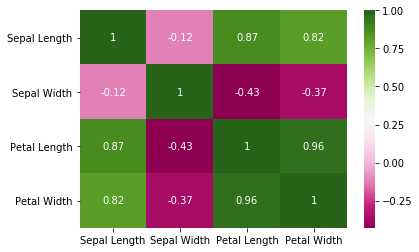

In [6]:
#correlation heatmap
correlation = iris_df.corr()
sns.heatmap(correlation, annot=True,  cmap="PiYG")

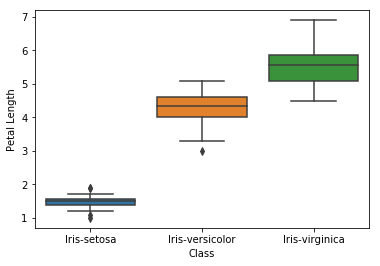

In [7]:
# individual feature in boxplot
sns.boxplot(x="Class", y="Petal Length", data=iris_df)

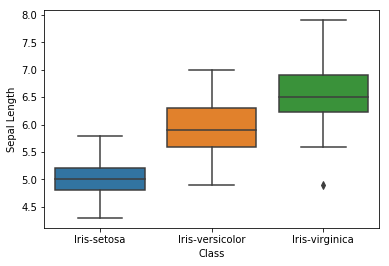

In [8]:
sns.boxplot(x="Class", y="Sepal Length", data=iris_df)

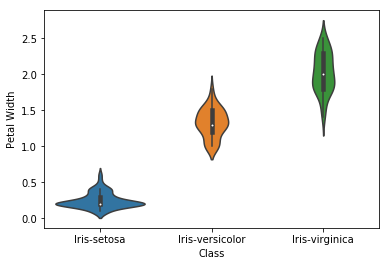

In [9]:
sns.violinplot(x="Class", y="Petal Width", data=iris_df)

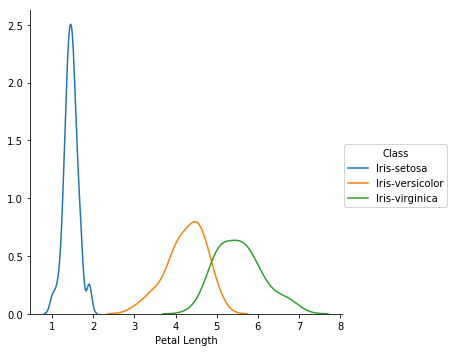

In [10]:
# Distribution of Petal Length with class
sns.FacetGrid(iris_df, hue="Class", size= 5).map(sns.kdeplot, "Petal Length").add_legend()

### Modeling

In [11]:
# create classification label
class_mapping = {label:idx for idx,label in enumerate(np.unique(iris_df['Class']))}
class_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [12]:
iris_df['Classlabel'] = iris_df['Class'].map(class_mapping)
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Classlabel
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [13]:
#split test/train dataset
# ONLY keep features Petal Length and Petal Width
from sklearn.model_selection import train_test_split

X, y = iris_df.iloc[:, 2:4].values, iris_df.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [14]:
#train dataset 
X_train.shape

(105, 2)

In [15]:
X_test.shape

(45, 2)

In [16]:
#standardize/ scale data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
pd.DataFrame(X_train_std).head()

,0,1
0,1.080800,1.704755
1,1.637094,1.311062
2,0.858283,1.442293
3,-1.533783,-1.313561
4,-1.311265,-1.313561


In [18]:
# visualization function

from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import warnings
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
   
    # setup marker generator and color map
    markers = ('o', 'D', '*', '^', 'v')
    colors = ('salmon','forestgreen', 'darkblue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl,edgecolor='black')
   
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0,
                    edgecolor = 'black', linewidths=1,marker='o',
                    s=55, label='test set')

### SVM

In [19]:
#Support Vector Classifier (SVM/SVC)

from sklearn.svm import SVC

svm = SVC(kernel='linear',random_state=1, probability = True)
svm.fit(X_train_std, y_train)
svm.score(X_test_std,y_test)

0.97777777777777775

In [20]:
print(classification_report(y_test, svm.predict(X_test_std)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45



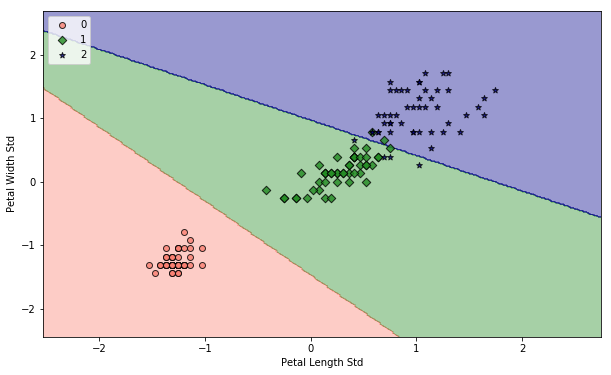

In [21]:
#visualization of the whole dataset
fig, axis1 = plt.subplots(1,1,figsize=(10,6))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=svm)
plt.xlabel('Petal Length Std')
plt.ylabel('Petal Width Std')
plt.legend(loc='upper left')
plt.show()


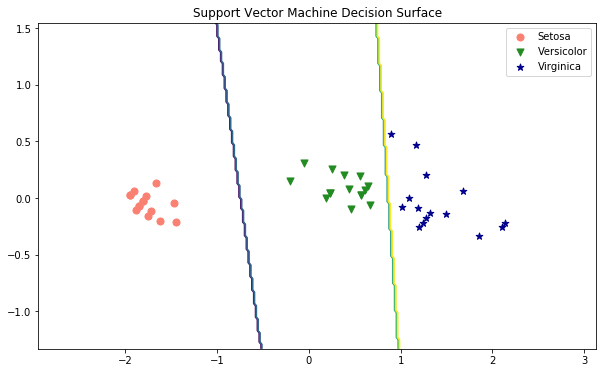

In [22]:
#visualization of the SVM decision boundries

import pylab as pl
from sklearn.decomposition import PCA
fig, axis1 = plt.subplots(1,1,figsize=(10,6))

pca = PCA(n_components=2).fit(X_test_std)
pca_2d = pca.transform(X_test_std)
svm_2d =svm.fit(pca_2d, y_test)
for i in range(0, pca_2d.shape[0]):
    if y_test[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='salmon', s=50,marker='o')
    elif y_test[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='forestgreen', s=50,marker='v')
    elif y_test[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='darkblue', s=50,marker='*')
pl.legend([c1, c2, c3], ['Setosa', 'Versicolor','Virginica'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),   np.arange(y_min, y_max, .02))
Z = svm_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.show()

### Logistic Regression

In [23]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(C=100)
logreg.fit(X_train_std, y_train)
logreg.score(X_test_std, y_test)

0.97777777777777775

In [24]:
print(classification_report(y_test, logreg.predict(X_test_std)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45



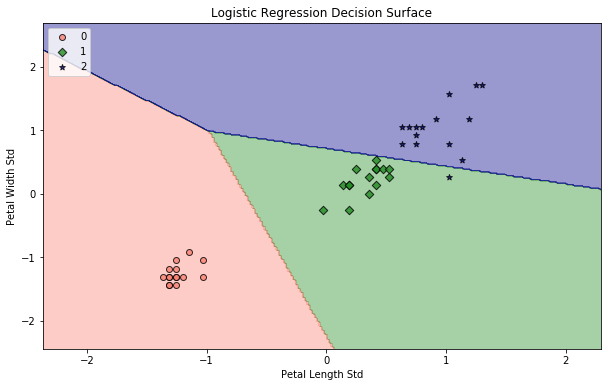

In [25]:
#visualization of the Logistic regression decision boundries
#only class0 and class1

fig, axis1 = plt.subplots(1,1,figsize=(10,6))

plot_decision_regions(X=X_test_std,y=y_test,classifier=logreg)
plt.xlabel('Petal Length Std')
plt.ylabel('Petal Width Std')
plt.legend(loc='upper left')
pl.title('Logistic Regression Decision Surface')
plt.show()

### Random Forest

In [26]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5,n_estimators=10)
rf.fit(X_train_std,  y_train)
rf.score(X_test_std, y_test)

0.97777777777777775

In [27]:
print(classification_report(y_test, rf.predict(X_test_std)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45



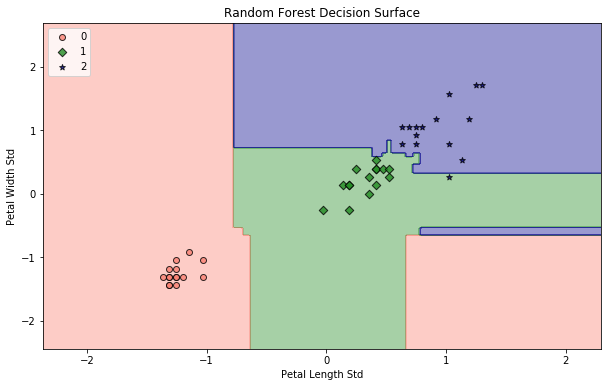

In [28]:
#visualization of the Random Forest decision boundries
fig, axis1 = plt.subplots(1,1,figsize=(10,6))

plot_decision_regions(X_test_std, y_test,classifier=rf)
plt.xlabel('Petal Length Std')
plt.ylabel('Petal Width Std')
plt.legend(loc='upper left')
pl.title('Random Forest Decision Surface')
plt.show()